In [1]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd 
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss

In [2]:
preprocessed_penguins_df = palmerpenguins.load_penguins()
preprocessed_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [3]:
processed_penguins_df = (
  preprocessed_penguins_df
  .dropna()
)

processed_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [4]:
processed_penguins_df.max(numeric_only=True)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64

In [5]:
preprocessed_penguins_df.min(numeric_only=True) # type: ignore

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

In [6]:
processed_penguins_df.max(numeric_only=True)-preprocessed_penguins_df.min(numeric_only=True) # type: ignore

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

In [7]:
processed_penguins_df.std(numeric_only=True)

bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
year                   0.812944
dtype: float64

In [8]:
processed_penguins_df.mean(numeric_only=True)+processed_penguins_df.std(numeric_only= True)

bill_length_mm         49.461461
bill_depth_mm          19.134100
flipper_length_mm     214.982732
body_mass_g          5012.272859
year                 2008.854986
dtype: float64

In [9]:
max_quantile = processed_penguins_df.quantile(0.75,numeric_only=True)
min_quantile = processed_penguins_df.quantile(0.25, numeric_only=True)
print(max_quantile-min_quantile)


bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
year                    2.0
dtype: float64


In [10]:
(
    processed_penguins_df
    .quantile(q=[0.75,0.5,0.25],numeric_only=True)
    .transpose()
    .rename_axis('variable')
    .reset_index()
    .assign(
      iqr=lambda df: df[0.75] - df[0.25]
    )
)

,variable,0.75,0.5,0.25,iqr
0,bill_length_mm,48.6,44.5,39.5,9.1
1,bill_depth_mm,18.7,17.3,15.6,3.1
2,flipper_length_mm,213.0,197.0,190.0,23.0
3,body_mass_g,4775.0,4050.0,3550.0,1225.0
4,year,2009.0,2008.0,2007.0,2.0


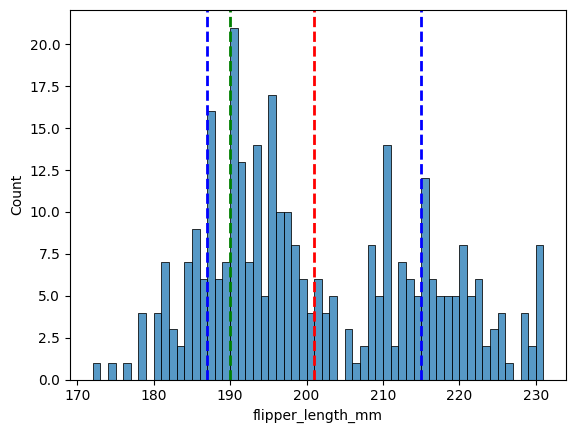

In [23]:
sns.histplot(
    binwidth=1,
    data=processed_penguins_df,
    x='flipper_length_mm',
)

penguin_flipper_length_mm = processed_penguins_df.flipper_length_mm


plt.axvline(
    x=penguin_flipper_length_mm.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=penguin_flipper_length_mm.std() + penguin_flipper_length_mm.mean(),
    color='blue',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=-penguin_flipper_length_mm.std() + penguin_flipper_length_mm.mean(),
    color='blue',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x = penguin_flipper_length_mm.mode().item(),
    color='green',
    linestyle='dashed',
    linewidth=2
)


plt.show()

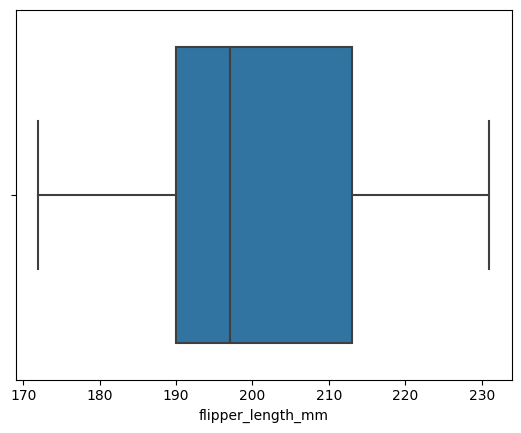

In [21]:
sns.boxplot(
    data=processed_penguins_df,
    x='flipper_length_mm'
)

plt.show()

Utilizando empiricaldist

In [25]:
pmf_flipper_length_mm=empiricaldist.Pmf.from_seq(
    processed_penguins_df.flipper_length_mm,
    normalize=True
)

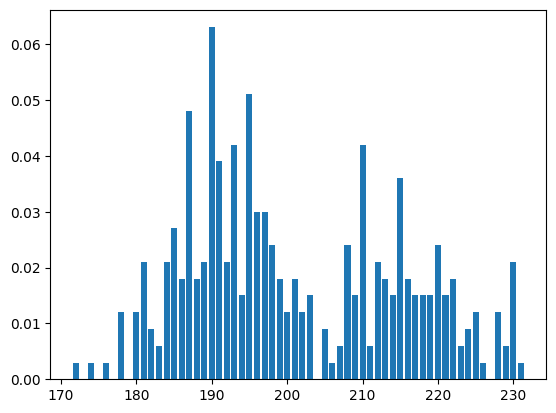

In [28]:
pmf_flipper_length_mm.bar()

In [34]:
pmf_flipper_length_mm(231)

0.003003003003003003

In [36]:
processed_penguins_df.flipper_length_mm.max()

231.0

Funciones empiricas de probabilidad acumulada (ECDFs)

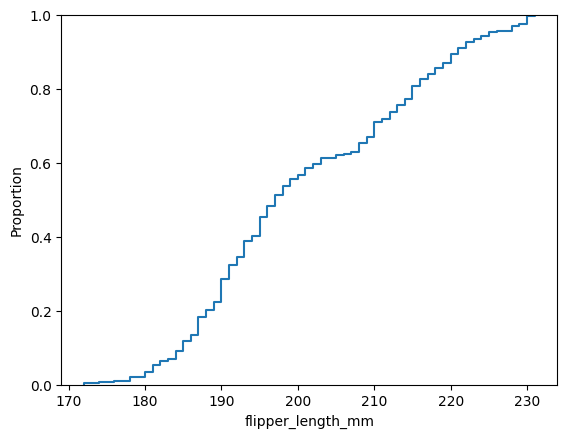

In [39]:
# Usando seaborn

sns.ecdfplot(
    data=processed_penguins_df,
    x='flipper_length_mm'
)
plt.show()

In [40]:
# usando empiricaldist

cdf_flipper_legth_mm = empiricaldist.Cdf.from_seq(
    processed_penguins_df.flipper_length_mm,
    normalize=True
)

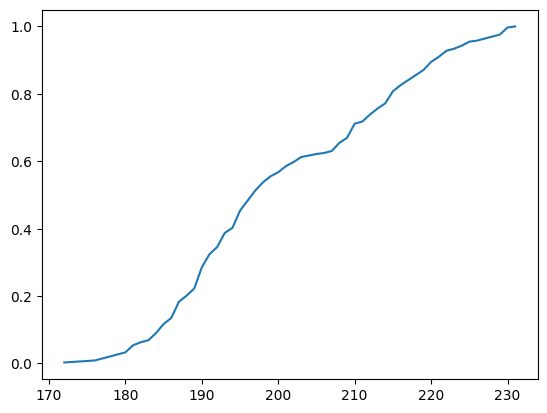

In [43]:
cdf_flipper_legth_mm.plot()



In [45]:
q=200
p=cdf_flipper_legth_mm(q)


print(q,p)

200 0.5675675675675675


Comprando distribuciones

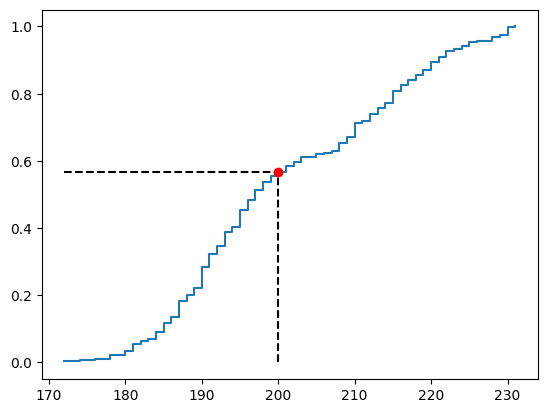

In [49]:
cdf_flipper_legth_mm.step()

plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color='black',
    linestyle='dashed'
)


plt.hlines(
    y=p,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=q,
    color='black',
    linestyle='dashed'
)


plt.plot(q,p,'ro')
